# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [3]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset


,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

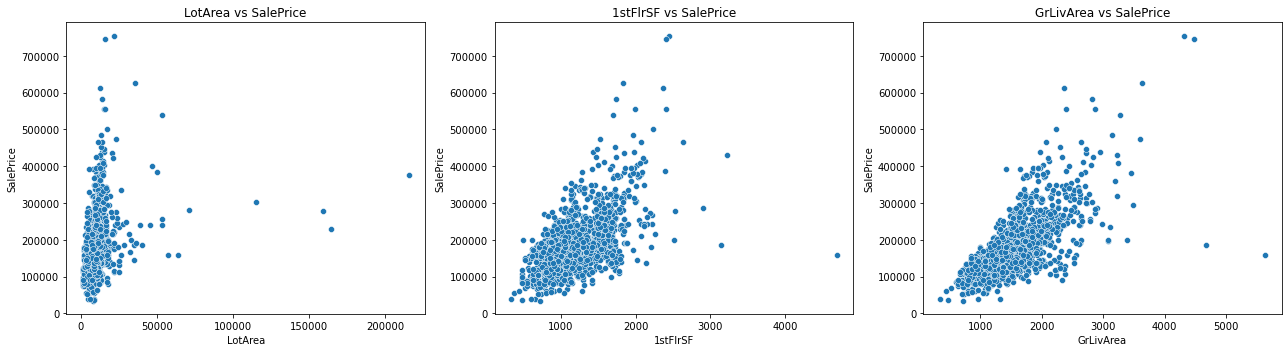

In [4]:
# Your code here - import relevant library, create scatter plots
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for the scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for LotArea vs SalePrice
sns.scatterplot(x='LotArea', y='SalePrice', data=ames_subset, ax=axes[0])
axes[0].set_title('LotArea vs SalePrice')
axes[0].set_xlabel('LotArea')
axes[0].set_ylabel('SalePrice')

# Scatter plot for 1stFlrSF vs SalePrice
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=ames_subset, ax=axes[1])
axes[1].set_title('1stFlrSF vs SalePrice')
axes[1].set_xlabel('1stFlrSF')
axes[1].set_ylabel('SalePrice')

# Scatter plot for GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=ames_subset, ax=axes[2])
axes[2].set_title('GrLivArea vs SalePrice')
axes[2].set_xlabel('GrLivArea')
axes[2].set_ylabel('SalePrice')

# Adjust layout
plt.tight_layout()
plt.show()


# Your written answer here - do these seem like good candidates for linear regression?

Yes,most of the features are positively related to th SalePrice

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [5]:
# Your code here - define y and baseline X
X = ames_subset[['GrLivArea']]
y = ames_subset['SalePrice']

In [6]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm

# Add a constant to the independent variable (intercept term)
X = sm.add_constant(X)

# Fit the simple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          4.52e-223
Time:                        12:36:34   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

# Your written answer here - interpret model results

**R-squared: 0.502**

This means that approximately 50.2% of the variability in SalePrice is explained by GrLivArea. While this is a substantial portion, it also indicates that nearly half of the variability in SalePrice is due to other factors not included in this model.

**Adjusted R-squared: 0.502**

The adjusted R-squared is the same as the R-squared here, suggesting that the model has only one predictor. For multiple predictors, the adjusted R-squared adjusts the R-squared value to account for the number of predictors.

**F-statistic: 1471**

This high F-statistic indicates that the model is statistically significant overall. The probability (p-value) associated with the F-statistic is extremely small (4.52e-223), suggesting that GrLivArea is a significant predictor of SalePrice.

**Coefficients**

**Intercept (const): 18,570.00**

This is the estimated sale price when GrLivArea is zero. While this value is theoretically part of the model, it may not have practical significance since a living area of zero is not realistic in this context.

**GrLivArea Coefficient: 107.13**

This coefficient indicates that for each additional square foot of living area, the sale price is expected to increase by $107.13, holding other factors constant. This is a substantial effect, suggesting that living area is a strong predictor of sale price.

**Statistical Significance**

**P-value for GrLivArea: 0.000**

The p-value for GrLivArea is significantly less than 0.05, indicating that the relationship between GrLivArea and SalePrice is statistically significant. This suggests that GrLivArea is a meaningful predictor of SalePrice.

Summary

**Overall Model Performance**

 The model explains 50.2% of the variance in SalePrice and is statistically significant. The predictor GrLivArea has a strong positive impact on SalePrice.

**Coefficient Interpretation**

 Each additional square foot of living area is associated with an increase of $107.13 in the sale price.

**Model Diagnostics**

There are some concerns about the normality of residuals, indicated by the Omnibus and Jarque-Bera tests. The condition number suggests potential numerical issues, but with a single predictor, this is less critical.


## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [7]:
# Your code here - define X
# Define the independent variables (predictors) 
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

In [8]:
# Your code here - fit model and display results
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.57e-262
Time:                        12:36:34   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

# Your written answer here - interpret model results. Does this model seem better than the previous one?

**R-squared: 0.565**

This means that approximately 56.5% of the variability in SalePrice is explained by the predictors (LotArea, 1stFlrSF, GrLivArea). This is a solid fit but suggests that nearly 44% of the variability is due to other factors not included in this model.

**Adjusted R-squared: 0.564**

This value, adjusted for the number of predictors, is very close to the R-squared, indicating that the model's fit is good considering the number of predictors.

**F-statistic: 630.3**

The high F-statistic indicates that the model is statistically significant overall. The p-value (1.57e-262) is extremely small, confirming that at least one of the predictors is significantly related to SalePrice.

Coefficients

**Intercept (const): -14,310**

This represents the estimated SalePrice when all predictors are zero. While this value may not be practically meaningful, it is part of the regression equation.

**LotArea: 0.2841**

This coefficient indicates that each additional square foot of lot area is associated with an increase of $0.2841 in SalePrice, holding other predictors constant. The coefficient is close to zero and its p-value (0.051) is just above the typical significance level of 0.05, suggesting it is marginally significant.

**1stFlrSF: 60.2866**

This coefficient means that each additional square foot of the first floor area is associated with an increase of $60.29 in SalePrice, holding other predictors constant. This predictor has a strong positive impact on SalePrice, with a very low p-value (0.000), indicating high statistical significance.

**GrLivArea: 80.6061**

This coefficient suggests that each additional square foot of living area is associated with an increase of $80.61 in SalePrice, holding other predictors constant. This predictor is also highly significant (p-value: 0.000).

Statistical Significance

**P-values**

**LotArea**: 0.051, which is just above the 0.05 threshold, suggesting that it is marginally significant. This implies that while LotArea does have an effect on SalePrice, it is less clear-cut compared to other predictors.
**1stFlrSF** and **GrLivArea**: Both have p-values much less than 0.05, indicating that these predictors are statistically significant and strongly associated with SalePrice.

Summary

**Overall Model Performance**: The model explains 56.5% of the variance in SalePrice and is statistically significant, with strong predictors like 1stFlrSF and GrLivArea.

**Coefficient Interpretation**:
Intercept: The baseline price when all predictors are zero.
LotArea: Small effect on SalePrice, with marginal significance.
1stFlrSF: Significant positive impact on SalePrice.
GrLivArea: Significant positive impact on SalePrice.

**Model Diagnostics**:
Residuals show non-normality and high kurtosis, which might affect the reliability of statistical inference.
High condition number indicates possible multicollinearity issues


In conclusion, the multiple linear regression model is generally better than the simple linear regression model in terms of fit and explanatory power. However, attention should be given to diagnostic issues to ensure that the model's assumptions are reasonably met and the results are reliable.







## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

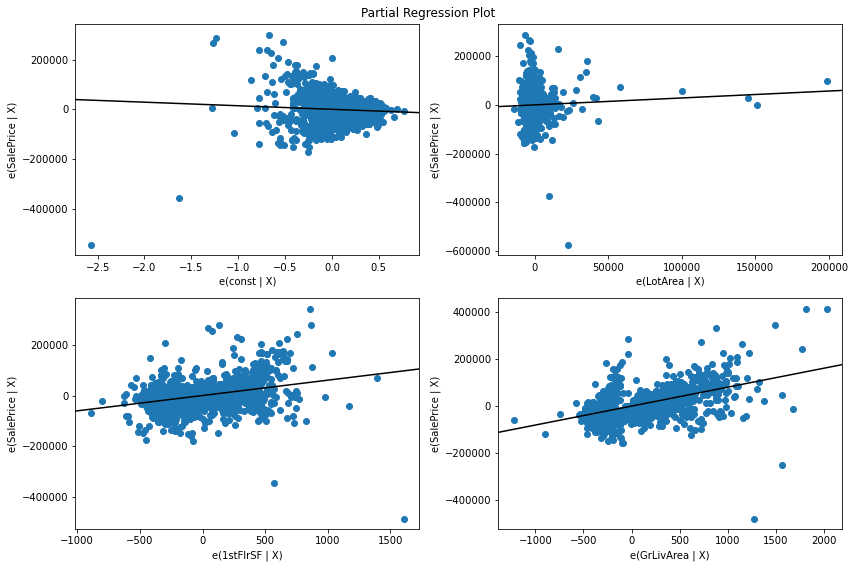

In [9]:
# Your code here - create partial regression plots for each predictor
from statsmodels.graphics.regressionplots import plot_partregress_grid

# Create partial regression plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model, fig=fig)
plt.show()


In [10]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [11]:
# Your code here - import linear regression from scikit-learn and create and fit model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and fit the model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = model_sklearn.coef_
intercept = model_sklearn.intercept_

# Predict on the test set
y_pred = model_sklearn.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print coefficients, intercept, and R-squared
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared:", r2)



Coefficients: [ 0.          0.30033318 56.21295883 77.7528426 ]
Intercept: -6261.597535369801
R-squared: 0.6258987939113458


# Your code here - compare R-Squared

**R-squared Values**
StatsModels: R-squared = 0.565
scikit-learn: R-squared = 0.626

**Comparison**

R-squared Value Comparison:
The R-squared value from scikit-learn (0.626) is higher than the R-squared value from StatsModels (0.565). This indicates that the scikit-learn model explains a slightly higher proportion of the variance in SalePrice.

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.